<a href="https://colab.research.google.com/github/aibak365/Machine-learning/blob/main/aljadaaa_DT_and_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: DT and RF

This lab is designed to challenge you to apply existing knowledge from previous lectures into real-world practices. We will be writing codes to practice decision trees and random forest algorithms. You might encounter some errors early, so please don't start late!


### Instructions
1. This lab uses the github dataset https://raw.githubusercontent.com/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/master/diabetes_dataset.csv

2. There are `NO` restrictions on library use. Feel free to simplify your code as you wish.

3. Make sure all plots, outputs and intermediate results are visible in the final pdf that you submit.

### Submission guide
Save a copy as UniqueID_Lab3.ipynb and submit the pdf file to Canvas, or a link to the file is ok. Make sure it is shared.

# Q1: Decision Trees (15 pts)
The dataset `diabetes_dataset.csv` is from the link https://raw.githubusercontent.com/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/master/diabetes_dataset.csv

In [ ]:
# import necessary libraries
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Dataset Preparation

In [ ]:
# loading the dataset into a pandas dataframe
# show first 5 rows of the dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/master/diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# print the distinct labels (Outcome)
# print the size of the dataset
print(df['Outcome'].unique())
print(df.shape)

[1 0]
(768, 9)


### Decision Tree

In [ ]:
# Make the train-test split in 80:20 ratio
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (614, 9)
Testing set shape: (154, 9)


In [ ]:
# Train a DT model using DecisionTreeClassifier() from sklearn
X_train = train_df.drop(columns=['Outcome'])
y_train = train_df['Outcome']
X_test = test_df.drop(columns=['Outcome'])
y_test = test_df['Outcome']
dtModel = DecisionTreeClassifier()
dtModel.fit(X_train, y_train)
# Predict the class for the test dataset
y_pred = dtModel.predict(X_test)

In [ ]:
# Print the accuracy of the classification
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.766


### Visualization

In [ ]:
# Train again with max_depth of 3
model = DecisionTreeClassifier(max_depth = 3 )

# Predict the class for the test dataset
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Print the accuracy of the classification
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with max_depth=3: {accuracy:.3f}")

Accuracy with max_depth=3: 0.760


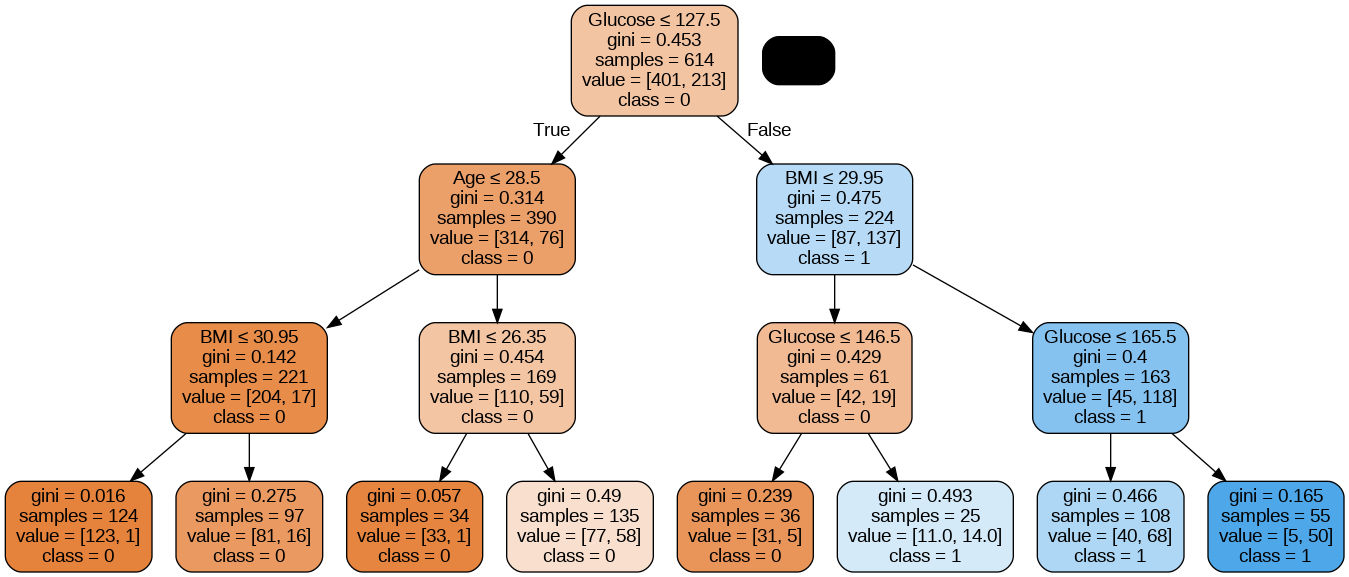

In [ ]:
# Code below generates a graph
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Feature column names
feature_cols = X_train.columns

# Generating tree
dot_data = StringIO()
export_graphviz(model,
                out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decisionTree.png')
Image(graph.create_png())

# Q2: Random Forest (15 pts)
Use the same dataset to train a Random Forest Model.

In [ ]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier

### Train RF

In [ ]:
# Train an RF model using RandomForestClassifier() from sklearn
rfModel = RandomForestClassifier(n_estimators=1000) # if u pick a random seed 42 will decrease
rfModel.fit(X_train, y_train)
# Predict the class for the test dataset
y_pred = rfModel.predict(X_test)


In [ ]:
# Print the accuracy of the classification
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# Did the accuracy increase?
# It hard to answer in my opinon because it depends on how spliting the data and the how n_estimators u pick, when i picked
# 100 n_estimators it was less than the firs model but with 1000 is better but not much accurate as the second
# and if u pick random_seed 42 for example u can see that the accuracy has decreased

0.7467532467532467


### Visualization

In [ ]:
# Train again with max_depth of 3
rfModel = RandomForestClassifier(max_depth=3, random_state=42)
rfModel.fit(X_train, y_train)

# Predict the class for the test dataset
y_pred = rfModel.predict(X_test)
# Print the accuracy of the classification
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7727272727272727


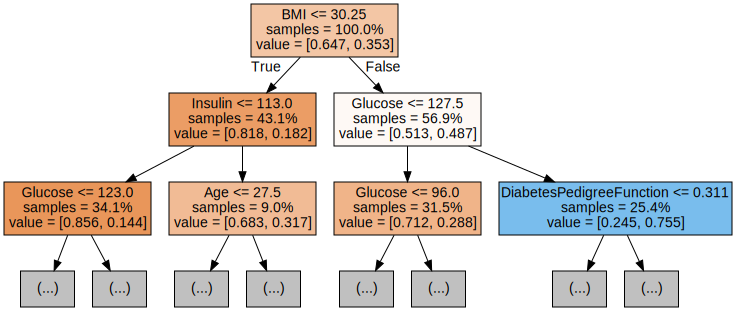

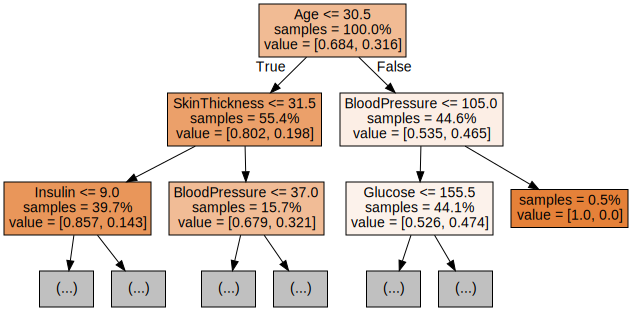

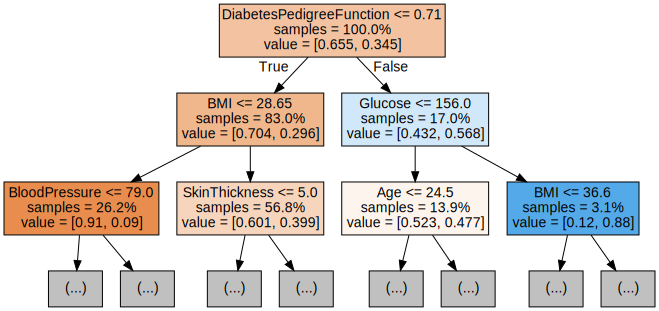

In [ ]:
# Drawing three decision trees
# was wondering why the leaf give only dots, as i understand cuz the max_depths, so there is not much information, when pick none, it start giving details
# please feel free to see the next cell
for i in range(3):
    tree = rfModel.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_cols,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

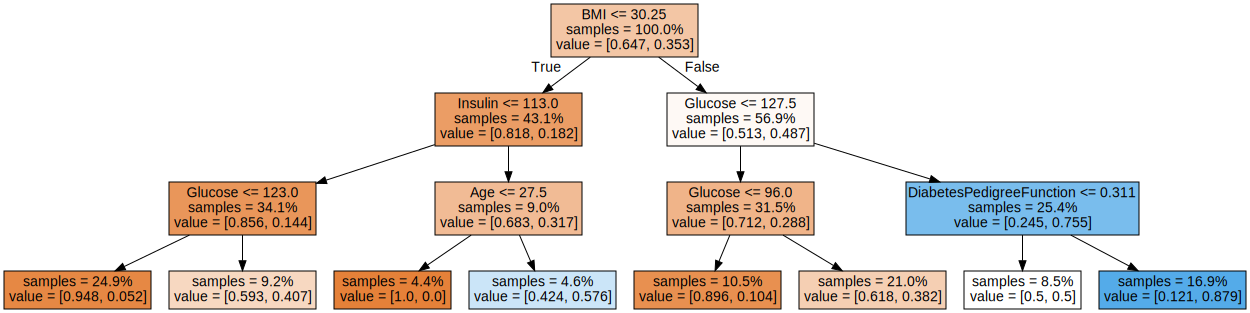

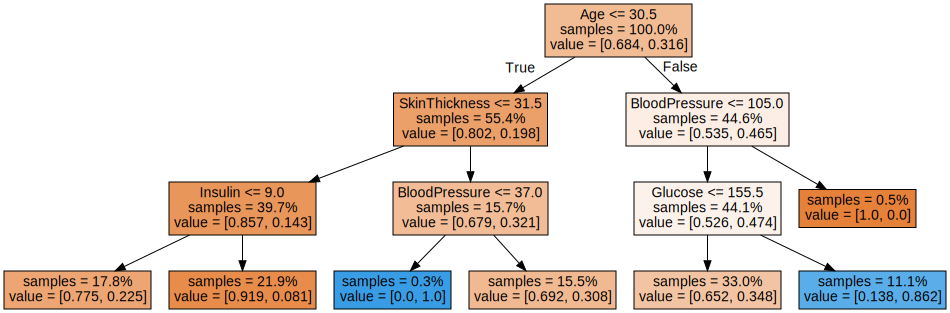

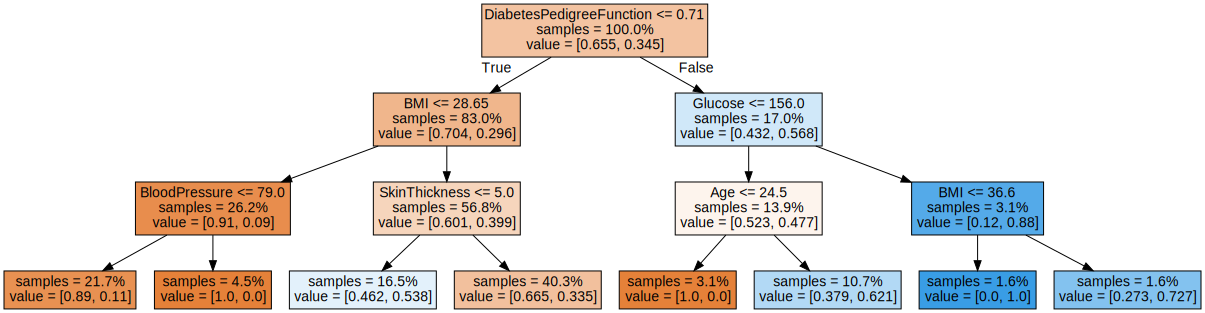

In [ ]:
for i in range(3):
    tree = rfModel.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_cols,
                               filled=True,
                               max_depth=None,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)